## Regression Trees

Regression Trees extend decision trees to **continuous target variables**.

Instead of predicting class labels, each leaf node predicts the mean of the
training samples that fall into that region.

This notebook demonstrates:
- Nonlinear regression using trees
- Visualization of piecewise-constant predictions


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rice_ml import train_test_split, standardize


MSE: 0.49465810394970744


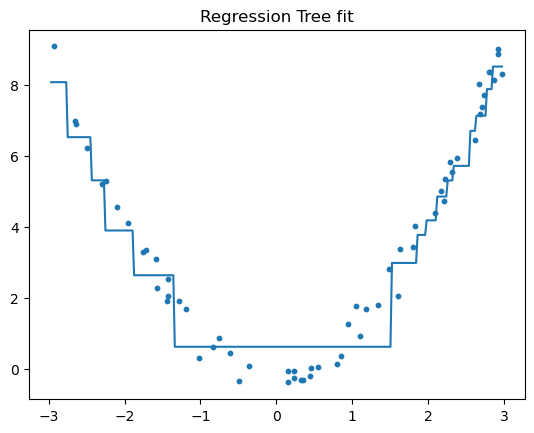

In [2]:
from rice_ml.supervised_learning.regression_trees import DecisionTreeRegressor
from rice_ml import mse

rng = np.random.default_rng(6)
X = rng.uniform(-3, 3, size=(250,1))
y = (X[:,0]**2) + rng.normal(0, 0.4, size=250)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=0)

reg = DecisionTreeRegressor(max_depth=4, random_state=0).fit(Xtr, ytr)
pred = reg.predict(Xte)

print("MSE:", mse(yte, pred))

# plot curve
grid = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
plt.scatter(Xte[:,0], yte, s=10)
plt.plot(grid[:,0], reg.predict(grid))
plt.title("Regression Tree fit")
plt.show()
